In [4]:
#1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#2. Load and Explore the Dataset

# Load your uploaded dataset
data = pd.read_csv('salary_data.csv')

# Preview the dataset
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
#3. Basic Data Info

# Structure and summary
print("Dataset Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None

Statistical Summary:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


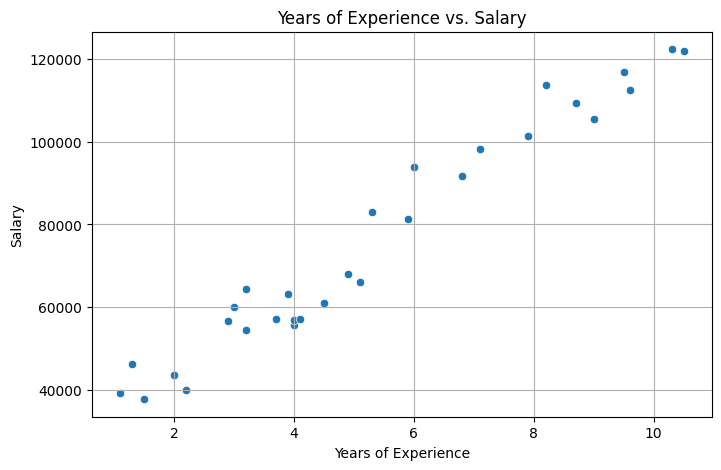

In [7]:
#4. Scatter Plot of Data

# Visualize experience vs salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [9]:
#5. Split the Dataset

# Features and target
X = data[['YearsExperience']]
y = data['Salary']

# 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#6. Train the Linear Regression Model

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict test data
y_pred = model.predict(X_test)

In [11]:
#7. Evaluate the Model

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 49830096.86
R² Score: 0.90


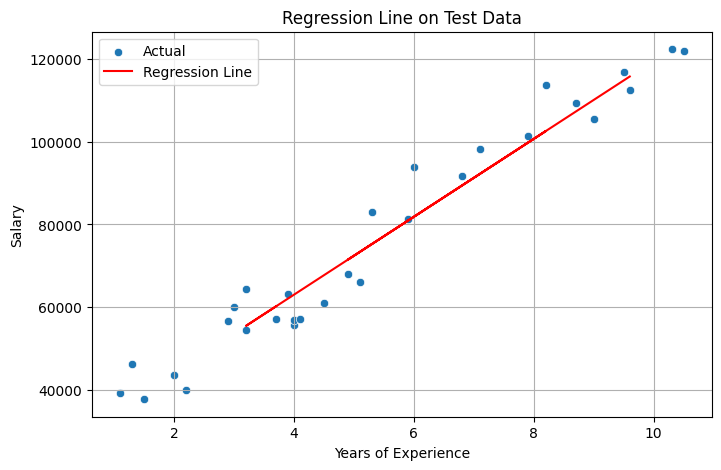

In [12]:
#8. Visualize Regression Line

# Scatter + regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=data, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Line on Test Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

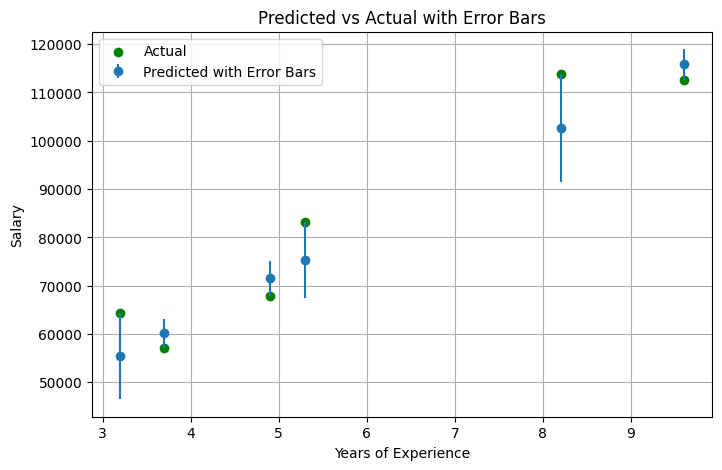

In [13]:
#9. Bonus: Error Bars

errors = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.errorbar(X_test.values.flatten(), y_pred, yerr=abs(errors), fmt='o', label='Predicted with Error Bars')
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.title("Predicted vs Actual with Error Bars")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

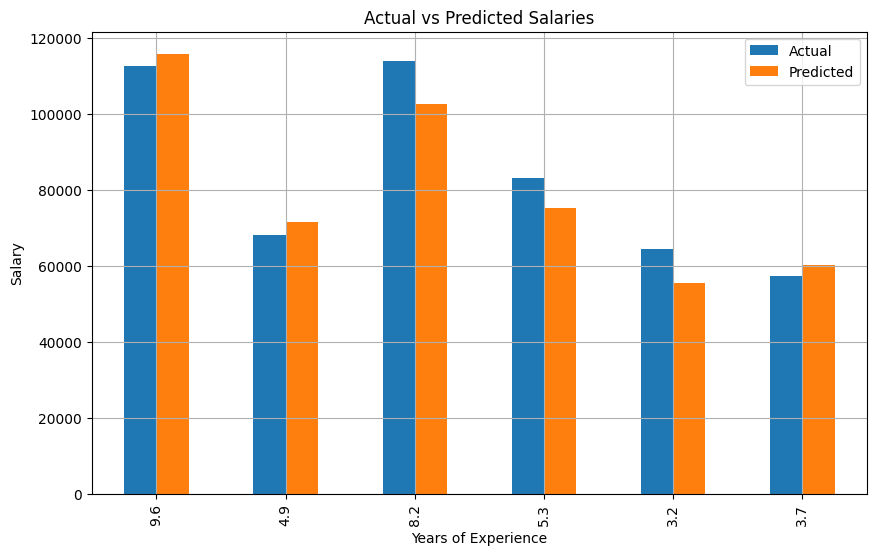

In [14]:
#10. Bonus: Compare Actual vs Predicted

# Bar chart
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}, index=X_test['YearsExperience'])
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [15]:
#11. Bonus: Predict from User Input

try:
    exp = float(input("Enter years of experience to predict salary: "))
    predicted_salary = model.predict([[exp]])
    print(f"Predicted Salary for {exp} years of experience is: ₹{predicted_salary[0]:,.2f}")
except ValueError:
    print("Invalid input. Please enter a numeric value.")

Enter years of experience to predict salary: 6
Predicted Salary for 6.0 years of experience is: ₹81,864.47


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
